In [1]:
import pandas as pd
import peptides as p
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pylab as pl
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [2]:
df = pd.read_excel('prep1.xlsx')

In [825]:
df1['phobicityAbr'] = round(df1.apply(lambda x: p.Peptide(x['seq']).hydrophobicity(scale="AbrahamLeo"), axis = 1),2)

In [831]:
table1 = p.tables.HYDROPHOBICITY["KyteDoolittle"]
table2 = p.tables.HYDROPHOBICITY["Eisenberg"]
df1['cross_cov8'] = round(df1.apply(lambda x: p.Peptide(x['seq']).cross_covariance(table1, table2, lag=8), axis = 1),2)

In [819]:
df1['Z'] = df1.apply(lambda x: p.Peptide(x['seq']).z_scales(), axis = 1)

In [821]:
Columns(df1['Z'], 'Z')

In [822]:
df1.drop(['Z'],axis = 1, inplace = True)

In [820]:
def Columns(col, col_name):
    for i in col:
        for m in range (len(i)):
            df1[col_name+str(m+1)] = round(df1.apply(lambda x: x['Z'][m], axis = 1),2)
            def drop(col):
                df1.drop(col,axis = 1, inplace = True)

In [172]:
df = pd.read_excel('model_ready.xlsx')

In [173]:
df

,Unnamed: 0,seq,class,length,propA,propR,propN,propD,propC,propE,...,BL4,BL5,BL6,BL7,BL8,BL9,BL10,auto_cov1,auto_cov2,classes
0,0,YLVN,positive,4,0.00,0.00,0.25,0.00,0.00,0.00,...,0.41,-0.14,0.21,0.08,-0.16,-0.17,0.05,0.07,-0.47,1
1,1,EEHLCFR,positive,7,0.00,0.14,0.00,0.00,0.14,0.29,...,0.21,0.34,-0.17,-0.19,0.21,0.14,-0.05,0.24,-0.17,1
2,2,TFY,positive,3,0.00,0.00,0.00,0.00,0.00,0.00,...,0.45,-0.22,0.06,-0.03,-0.70,0.43,-0.49,-0.13,0.01,1
3,3,VYTE,positive,4,0.00,0.00,0.00,0.00,0.00,0.25,...,0.11,-0.24,0.00,-0.26,-0.46,0.47,0.18,-0.08,0.04,1
4,4,VSAFLA,positive,6,0.33,0.00,0.00,0.00,0.00,0.00,...,0.14,-0.07,0.29,0.24,-0.11,0.60,-0.03,0.55,0.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,QCRRLCYKQRCVTYCRGR,negative,18,0.00,0.28,0.00,0.00,0.22,0.00,...,-0.03,0.79,-0.12,0.07,0.08,0.04,-0.12,0.00,-0.25,0
462,462,QGIGVGDNDGKRGKR,negative,15,0.00,0.13,0.07,0.13,0.00,0.00,...,-0.05,-0.07,0.52,0.26,0.39,-0.07,-0.05,0.34,0.19,0
463,463,QSHLSLCRWCCNCCRSNKGC,negative,20,0.00,0.10,0.10,0.00,0.30,0.00,...,0.24,0.78,-0.06,-0.09,0.01,-0.13,-0.04,-0.06,-0.14,0
464,464,RRWQWR,negative,6,0.00,0.50,0.00,0.00,0.00,0.00,...,-0.96,0.76,0.17,0.08,-0.01,-0.16,0.02,0.41,0.48,0


In [174]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
#let's create the dictionary of all the amino acids with their molecular weights
amino_acids = {'A': 89.1, 'R':174.2, 'N':132.12, 'D':133.11, 'C':121.16, 'E':147.13, 'Q':146.13,
              'G':75.07, 'H':155.16, 'I':131.18, 'L':131.18, 'K':146.19, 'M':149.21, 'F':165.19, 'P':115.13,
              'S':105.09, 'T': 119.12, 'W':204.23, 'Y': 181.19, 'V':117.15}

In [777]:
#lets create a function that will calculate the lenght of peptides
def length1 (df):
    df['length'] = df.apply(lambda x: len(x['seq']), axis = 1)
    return df

In [778]:
#let's create the function that will calculate the proportion of amino acids in a given peptide
def prop2 (df,amino,seq):
    df['prop'+amino] = round(df.apply(lambda x: x['seq'].count(amino)/len(x['seq']), axis = 1),2)
    return df

In [779]:
length1(df1)

,seq,ali_index,auto_cor1,auto_cov1,auto_cov2,auto_cov3,auto_cov4,auto_cov5,auto_cov6,auto_cov7,...,T5,VHSE1,VHSE2,VHSE3,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,length
0,TKGQ,0.00,0.01,0.00,0.29,0.02,0.00,0.00,0.00,0.00,...,1.08,-0.67,-0.31,-0.57,0.54,0.28,-0.02,0.66,-0.31,4
1,MMLQK,78.00,0.34,0.30,-0.26,-0.34,-0.18,0.00,0.00,0.00,...,-0.29,0.25,-0.03,0.42,0.03,0.48,-0.02,-0.04,-0.45,5
2,TPAIS,98.00,0.24,0.17,-0.15,-0.02,0.00,0.00,0.00,0.00,...,0.86,0.13,-0.56,-0.63,-0.83,-0.01,-0.72,-0.28,0.69,5
3,HTYHEVTKH,32.22,0.10,0.07,-0.28,0.03,0.31,-0.03,0.04,0.12,...,0.18,-0.33,0.00,0.20,-0.17,0.18,0.35,0.28,0.26,9
4,WPVLAYHFT,86.67,0.24,0.20,-0.10,-0.15,0.01,0.22,-0.04,-0.01,...,0.21,0.59,0.15,0.23,-0.35,0.27,-0.37,-0.35,0.21,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,TYQTF,0.00,0.26,0.06,-0.20,-0.06,-0.02,0.00,0.00,0.00,...,0.29,0.10,0.26,0.24,-0.28,0.15,0.19,-0.81,-0.07,5
117,SGQYFL,65.00,0.66,0.25,-0.23,-0.23,-0.01,-0.02,0.00,0.00,...,0.73,0.28,0.00,-0.17,0.30,0.04,-0.22,-0.17,-0.50,6
118,YYDPL,78.00,0.14,0.04,-0.21,-0.06,-0.08,0.00,0.00,0.00,...,0.02,0.33,0.75,0.36,0.14,-0.28,-0.18,-0.40,0.49,5
119,IFGAIWNGIKSLF,127.69,0.19,0.21,-0.35,0.34,0.58,-0.26,-0.30,0.31,...,0.69,0.51,-0.11,-0.18,-0.08,0.16,-0.56,0.16,-0.46,13


In [780]:
peps = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V']
for aa in peps:
    prop2 (df1,aa,df1['seq'])

In [783]:
df1.to_excel('used_for_test.xlsx')

In [14]:
x6 = df.rename(columns = {'propA':'A', 'propC':'C', 'propR':'R', 'propN':'N','propH':'H','propD':'D','propE':'E','propQ':'Q',
                         'propG':'G','propI': 'I', 'propL':'L', 'propK':'K','propM':'M','propF':'F', 'propP':'P','propS':'S',
                         'propT':'T', 'propW':'W','propY':'Y','propV':'V'})
x1 = x6[['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','H','S','E']]
y = x6['class']

C:\Users\kuagbo\AppData\Local\Temp\ipykernel_18880\3336879257.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = x6.groupby('class')['A','C','D', 'E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','Y','W'].sum()


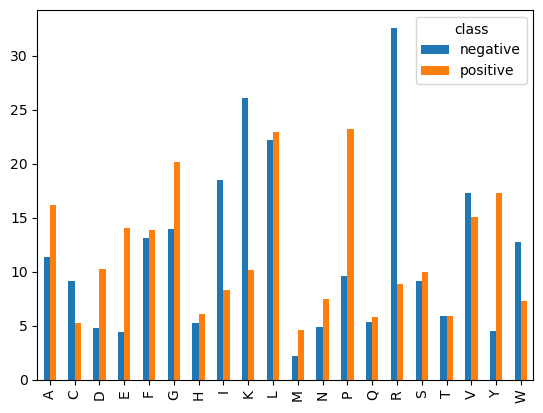

In [16]:
plot = x6.groupby('class')['A','C','D', 'E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','Y','W'].sum()
x1 = x6[['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','H','S','E']]
y = x6['class']
plot1 = plot.transpose()
plot1.plot(kind = 'bar')
plt.show()

In [99]:
df

,seq,class,length,propA,propR,propN,propD,propC,propE,propQ,...,BL3,BL4,BL5,BL6,BL7,BL8,BL9,BL10,auto_cov1,auto_cov2
0,YLVN,positive,4,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,-0.53,0.41,-0.14,0.21,0.08,-0.16,-0.17,0.05,0.07,-0.47
1,EEHLCFR,positive,7,0.00,0.14,0.00,0.00,0.14,0.29,0.00,...,-0.38,0.21,0.34,-0.17,-0.19,0.21,0.14,-0.05,0.24,-0.17
2,TFY,positive,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.24,0.45,-0.22,0.06,-0.03,-0.70,0.43,-0.49,-0.13,0.01
3,VYTE,positive,4,0.00,0.00,0.00,0.00,0.00,0.25,0.00,...,-0.43,0.11,-0.24,-0.00,-0.26,-0.46,0.47,0.18,-0.08,0.04
4,VSAFLA,positive,6,0.33,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.06,0.14,-0.07,0.29,0.24,-0.11,0.60,-0.03,0.55,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,QCRRLCYKQRCVTYCRGR,negative,18,0.00,0.28,0.00,0.00,0.22,0.00,0.11,...,-0.08,-0.03,0.79,-0.12,0.07,0.08,0.04,-0.12,-0.00,-0.25
462,QGIGVGDNDGKRGKR,negative,15,0.00,0.13,0.07,0.13,0.00,0.00,0.07,...,0.24,-0.05,-0.07,0.52,0.26,0.39,-0.07,-0.05,0.34,0.19
463,QSHLSLCRWCCNCCRSNKGC,negative,20,0.00,0.10,0.10,0.00,0.30,0.00,0.05,...,0.37,0.24,0.78,-0.06,-0.09,0.01,-0.13,-0.04,-0.06,-0.14
464,RRWQWR,negative,6,0.00,0.50,0.00,0.00,0.00,0.00,0.17,...,-0.18,-0.96,0.76,0.17,0.08,-0.01,-0.16,0.02,0.41,0.48


In [100]:
df.to_excel('model_ready.xlsx')

In [17]:
df

,Unnamed: 0,seq,class,length,propA,propR,propN,propD,propC,propE,...,BL3,BL4,BL5,BL6,BL7,BL8,BL9,BL10,auto_cov1,auto_cov2
0,0,YLVN,positive,4,0.00,0.00,0.25,0.00,0.00,0.00,...,-0.53,0.41,-0.14,0.21,0.08,-0.16,-0.17,0.05,0.07,-0.47
1,1,EEHLCFR,positive,7,0.00,0.14,0.00,0.00,0.14,0.29,...,-0.38,0.21,0.34,-0.17,-0.19,0.21,0.14,-0.05,0.24,-0.17
2,2,TFY,positive,3,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.24,0.45,-0.22,0.06,-0.03,-0.70,0.43,-0.49,-0.13,0.01
3,3,VYTE,positive,4,0.00,0.00,0.00,0.00,0.00,0.25,...,-0.43,0.11,-0.24,0.00,-0.26,-0.46,0.47,0.18,-0.08,0.04
4,4,VSAFLA,positive,6,0.33,0.00,0.00,0.00,0.00,0.00,...,-0.06,0.14,-0.07,0.29,0.24,-0.11,0.60,-0.03,0.55,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,QCRRLCYKQRCVTYCRGR,negative,18,0.00,0.28,0.00,0.00,0.22,0.00,...,-0.08,-0.03,0.79,-0.12,0.07,0.08,0.04,-0.12,0.00,-0.25
462,462,QGIGVGDNDGKRGKR,negative,15,0.00,0.13,0.07,0.13,0.00,0.00,...,0.24,-0.05,-0.07,0.52,0.26,0.39,-0.07,-0.05,0.34,0.19
463,463,QSHLSLCRWCCNCCRSNKGC,negative,20,0.00,0.10,0.10,0.00,0.30,0.00,...,0.37,0.24,0.78,-0.06,-0.09,0.01,-0.13,-0.04,-0.06,-0.14
464,464,RRWQWR,negative,6,0.00,0.50,0.00,0.00,0.00,0.00,...,-0.18,-0.96,0.76,0.17,0.08,-0.01,-0.16,0.02,0.41,0.48


In [551]:
df.columns.tolist()

['seq',
 'class',
 'length',
 'propA',
 'propR',
 'propN',
 'propD',
 'propC',
 'propE',
 'propQ',
 'propG',
 'propH',
 'propI',
 'propL',
 'propK',
 'propM',
 'propF',
 'propP',
 'propS',
 'propT',
 'propW',
 'propY',
 'propV',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'VHSE1',
 'VHSE2',
 'VHSE3',
 'VHSE4',
 'VHSE5',
 'VHSE6',
 'VHSE7',
 'VHSE8',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'SVG1',
 'SVG2',
 'SVG3',
 'SVG4',
 'SVG5',
 'SVG6',
 'SVG7',
 'SVG8',
 'SVG9',
 'SVG10',
 'SVG11',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'ST6',
 'ST7',
 'ST8',
 'SV1',
 'SV2',
 'SV3',
 'SV4',
 'protfp1',
 'protfp2',
 'protfp3',
 'protfp4',
 'protfp5',
 'protfp6',
 'protfp7',
 'protfp8',
 'PD1',
 'PD2',
 'pcp1',
 'pcp2',
 'pcp3',
 'pcp4',
 'pcp5',
 'WHIM1',
 'WHIM2',
 'WHIM3',
 'mw',
 'KF1',
 'KF2',
 'KF3',
 'KF4',
 'KF5',
 'KF6',
 'KF7',
 'KF8',
 'KF9',
 'KF10',
 'pI',
 'inst_index',
 'phobicityAbo',
 'phobicityAbr',
 'mom100',
 'mom160',
 'FG1',
 'FG2',
 'FG3',
 'FG4',
 'FG5',
 'FG6',
 'PP1',
 'PP2',
 'PP3',

In [ ]:
X_test = df1[['charge', 'mw','boman','protfp2','length','SVG7','phobicityAbo','protfp4','protfp1','mom160','SVG5',
       'Z4','cross_cov7','SVG10','cross_cov4','BL6','protfp3','VHSE5','mom100','protfp7','KF1','KF4','KF6','KF10',
       'VHSE4','Z4','Z5','inst_index','propE']]

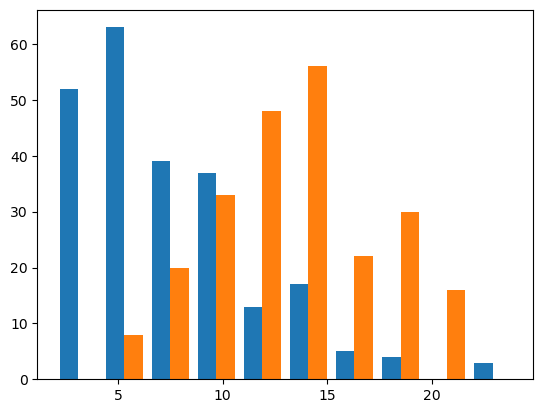

In [11]:
x1 = df[df['class'] == 'positive']
x2 = x1['length']
x3 = df[df['class'] == 'negative']
x4 = x3['length']
names = ['antioxidant', 'non-antioxidant']
plt.hist([x2, x4], bins = 10)
plt.show()

In [184]:
X = df.drop(['class','classes','seq'], axis = 1)
y = df['classes']

In [197]:
X = df[['charge', 'mw','boman','protfp2','length','SVG7','phobicityAbo','protfp4','protfp1','mom160','SVG5',
       'Z4','cross_cov7','SVG10','cross_cov4','BL6','protfp3','VHSE5','mom100','protfp7','KF1','KF4','KF6','KF10',
       'VHSE4','Z4','Z5','inst_index','propE']]

In [198]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (326, 29) (326,)
Test set: (140, 29) (140,)


In [199]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C = 10000)
clf.fit(X_train, y_train)

SVC(C=10000)

In [170]:
df.drop(['SV'], axis = 1, inplace = True)

In [186]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C = 4)
clf.fit(X_train, y_train)

SVC(C=4, kernel='linear')

In [200]:
SVM_yhat = clf.predict(X_test)
SVM_yhat[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [201]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('positive label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        69
           1       0.91      0.94      0.92        71

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

Confusion matrix, without normalization
[[67  4]
 [ 7 62]]


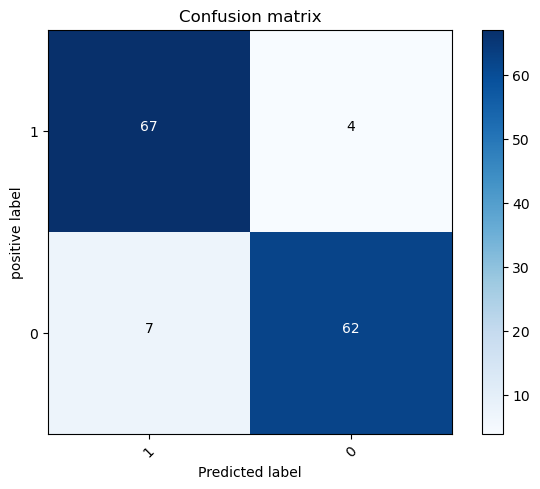

In [202]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, SVM_yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, SVM_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],normalize= False,  title='Confusion matrix')

In [203]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, SVM_yhat,pos_label=1)

0.8589743589743589

In [204]:
from sklearn.metrics import f1_score
f1_score(y_test, SVM_yhat, average='weighted') 

0.9213683634373289

In [205]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8285714285714286

In [138]:
OXTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
OXTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [139]:
OXTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [140]:
Tree_yhat = OXTree.predict(X_test)

In [141]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, Tree_yhat))

DecisionTrees's Accuracy:  0.8428571428571429


In [16]:
import shap

In [191]:
explainer = shap.Explainer(clf, X_test)

In [192]:
shap_values = explainer(X_test)

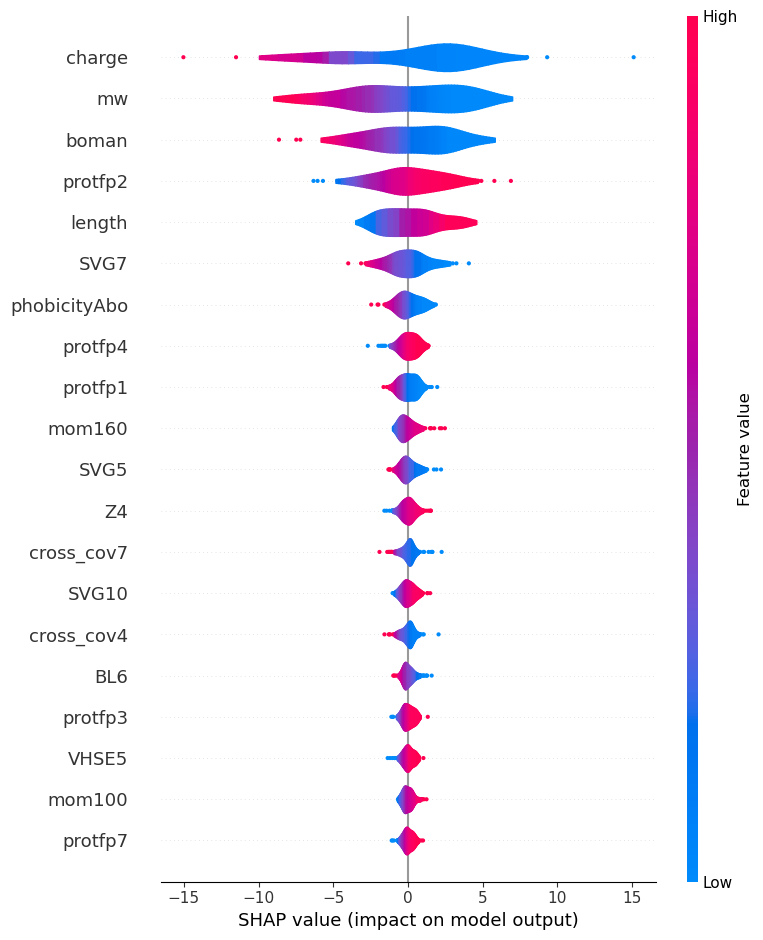

In [193]:
shap.summary_plot(shap_values, plot_type='violin')

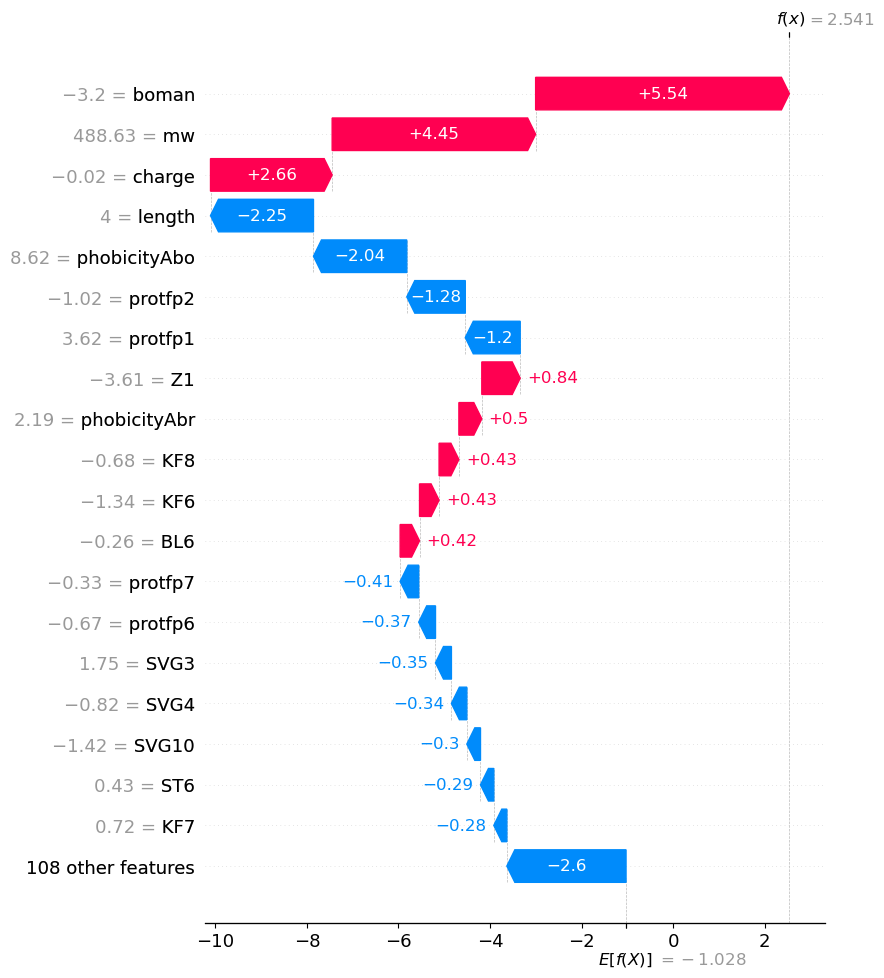

In [194]:
shap.plots.waterfall(shap_values[0], max_display=20)

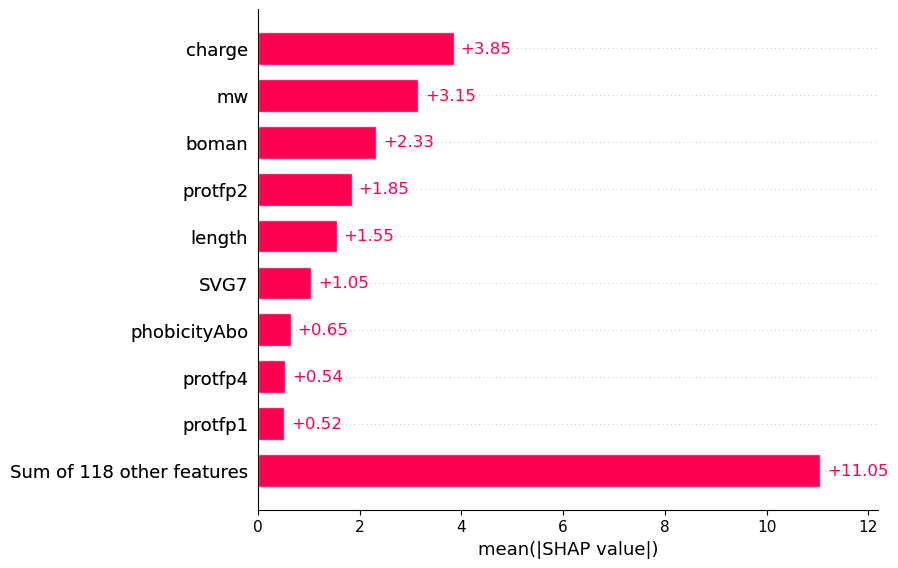

In [195]:
shap.plots.bar(shap_values)

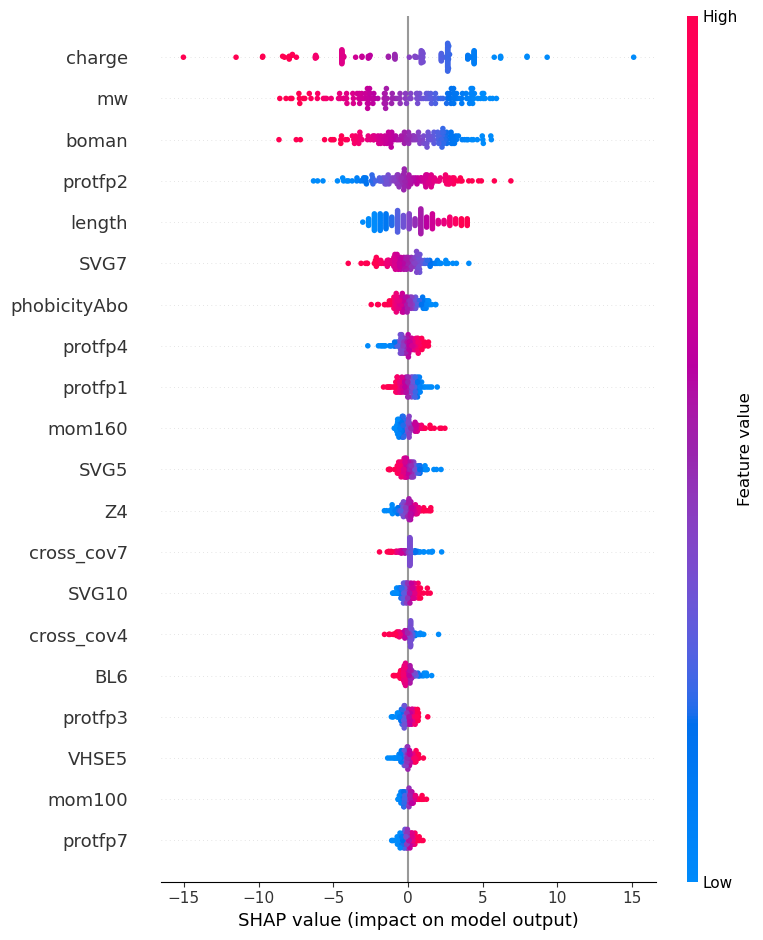

In [179]:
shap.summary_plot(shap_values, X_test)

In [188]:
df['class'].value_counts()

positive    233
negative    233
Name: class, dtype: int64

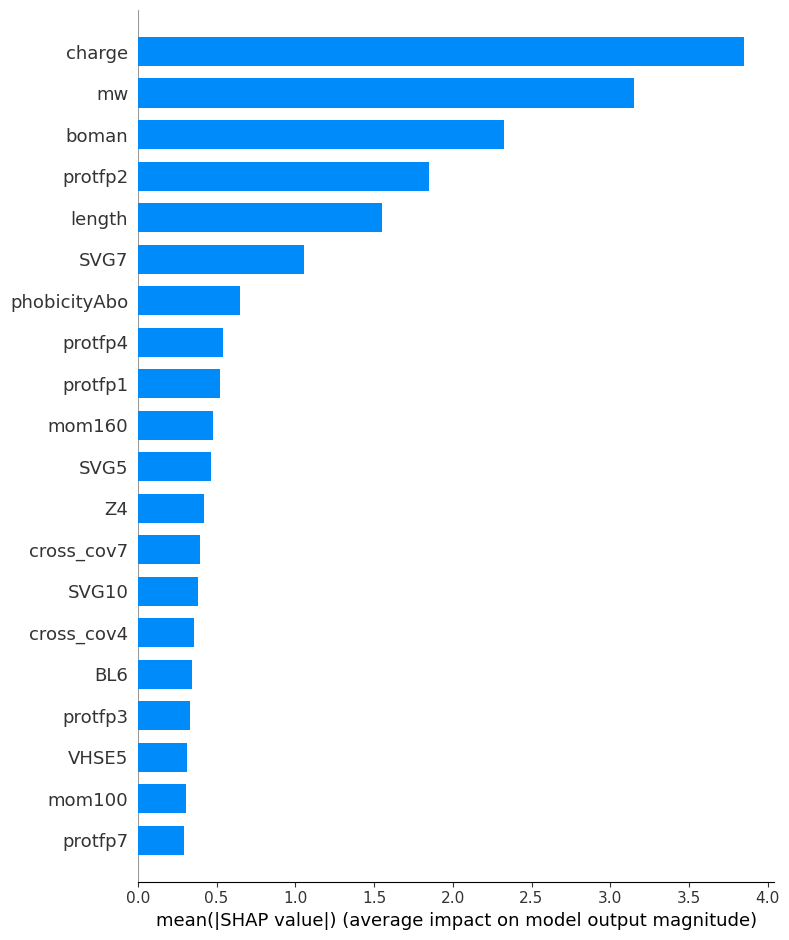

In [196]:
shap.summary_plot(shap_values, X, plot_type='bar')

In [199]:
X = df[['charge', 'mw','boman','protfp2','length','SVG7','phobicityAbo','protfp4','protfp1','mom160','SVG5',
       'Z4','cross_cov7','SVG10','cross_cov4','BL6','protfp3','VHSE5','mom100','protfp7','KF1']]

In [208]:
df1 = pd.read_excel('fortest_10.xlsx')

In [835]:
df1['seq'].values

array(['TKGQ', 'MMLQK', 'TPAIS', 'HTYHEVTKH', 'WPVLAYHFT', 'WEGPK', 'GPP',
       'GVPLT', 'PSYV', 'WDR', 'PYFNK', 'AAAAG', 'NVLVG', 'NAAKL',
       'FLHRP', 'QP', 'TA', 'GGYDEY', 'GGYDEYR', 'GAPGARGPNGY',
       'SGPPVPGPIGPM', 'GVSGLHID', 'PTPSRPQQGPA', 'PGRRAA', 'IVLPDEGK',
       'SVSIRADGGEGEVTVFT', 'YYPYQL', 'MTTL', 'FFGFN', 'MPDAHL',
       'APLEEPSSPH', 'FDKDGDGTITT', 'AGFAGDDAPR', 'KIEL', 'AH', 'VKAGE',
       'RF', 'SNIP', 'IADHFL', 'YNLKERYAAW', 'LHDELT', 'KEEKFE', 'EGR',
       'GPR', 'GY', 'VGGRP', 'MILMR', '\xa0FPYLRH', 'GIEWA', 'LKPGN',
       'LQP', 'RDPEER', 'ATVY', 'PMRGGGGYHY', 'VGPWQK', 'MY', 'MHIRL',
       'WYSLAMAASDI', 'YVEEL', 'PVMGD', 'EHGV', 'LLPHH', 'LVNHDHQN',
       'VNHDHQN', 'KHDRGDEF', 'FRDEHKK', 'TWKVV', 'FWKVV', 'NFWWP',
       'YASVV', 'WVWWW', 'VIAPW', 'YFLWP', 'FMPLH', 'IRWWW', 'MWKVW\xa0',
       'GGPAGPAV', 'GPVA', 'GF', 'PP', 'SYELPDGQVITIGNER',
       'YPIEHGIITNWDDMEK', 'EEYDESGPGIVHR', 'EVDRLEDELVNEK',
       'ALSNAEGEVAALNR', 'NLNDEIAHQDELIN

In [839]:
dic = {'seq':['TKGQ', 'MMLQK', 'TPAIS', 'HTYHEVTKH', 'WPVLAYHFT', 'WEGPK', 'GPP',
       'GVPLT', 'PSYV', 'WDR', 'PYFNK', 'AAAAG', 'NVLVG', 'NAAKL',
       'FLHRP', 'QP', 'TA', 'GGYDEY', 'GGYDEYR', 'GAPGARGPNGY',
       'SGPPVPGPIGPM', 'GVSGLHID', 'PTPSRPQQGPA', 'PGRRAA', 'IVLPDEGK',
       'SVSIRADGGEGEVTVFT', 'YYPYQL', 'MTTL', 'FFGFN', 'MPDAHL',
       'APLEEPSSPH', 'FDKDGDGTITT', 'AGFAGDDAPR', 'KIEL', 'AH', 'VKAGE',
       'RF', 'SNIP', 'IADHFL', 'YNLKERYAAW', 'LHDELT', 'KEEKFE', 'EGR',
       'GPR', 'GY', 'VGGRP', 'MILMR', '\xa0FPYLRH', 'GIEWA', 'LKPGN',
       'LQP', 'RDPEER', 'ATVY', 'PMRGGGGYHY', 'VGPWQK', 'MY', 'MHIRL',
       'WYSLAMAASDI', 'YVEEL', 'PVMGD', 'EHGV', 'LLPHH', 'LVNHDHQN',
       'VNHDHQN', 'KHDRGDEF', 'FRDEHKK', 'TWKVV', 'FWKVV', 'NFWWP',
       'YASVV', 'WVWWW', 'VIAPW', 'YFLWP', 'FMPLH', 'IRWWW', 'MWKVW\xa0',
       'GGPAGPAV', 'GPVA', 'GF', 'PP', 'SYELPDGQVITIGNER',
       'YPIEHGIITNWDDMEK', 'EEYDESGPGIVHR', 'EVDRLEDELVNEK',
       'ALSNAEGEVAALNR', 'NLNDEIAHQDELINK', 'LEQTLDELEDSLER', 'GPAV',
       'EWFTFLKEAGQGAKDMWR', 'GQGAKDMWR', 'REWFTFLK', 'MPFLKSPIVPF',
       'VPVTST', 'LTTLDSE', 'DHTKE', 'FFEFH', 'WCTSVS', 'CKYVCTCKMS',
       'CERPTCCEHS', 'MLPSLPK', 'HLPLL', 'NLPLL', 'HNLPLL', 'KGVL',
       'HLPLLR', 'HGVLQ', 'GLYSPH', 'LVRVQ', 'YLSF', 'DQVPR', 'LPLLR',
       'VKPVAPF', 'TPA', 'SP', 'LPS', 'YYIVS', 'TYQTF', 'SGQYFL', 'YYDPL',
       'IFGAIWNGIKSLF', 'GWMSKIASGIGTFLSGMQQ'], 'pred_label':['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative']}

In [840]:
df2 = pd.DataFrame(dic)

In [841]:
df2.to_excel('SVM_pred_10_01_24.xlsx')

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=1, random_state=21)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8785714285714286

In [164]:
ens_yhat = model.predict(X_test)

In [147]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.01)

In [149]:
LR_yhat = LR.predict(X_test)

In [151]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, LR_yhat,pos_label=1)

0.7777777777777778

In [152]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.86, 0.78, 0.84, 0.79, 0.81, 0.79, 0.81, 0.81, 0.84, 0.84, 0.86,
       0.86, 0.88, 0.86, 0.88, 0.86, 0.86, 0.86, 0.88, 0.87, 0.87, 0.86,
       0.86, 0.86])

In [153]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8251533742331288
Test set Accuracy:  0.8571428571428571


In [154]:
k = 13
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=13)

In [155]:
KNN_yhat = neigh.predict(X_test)
KNN_yhat

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

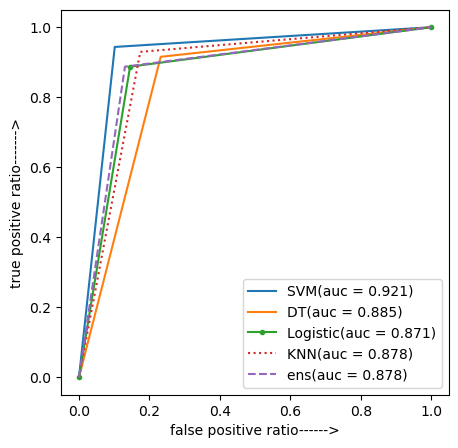

In [165]:
from sklearn.metrics import roc_curve,auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, LR_yhat)
auc_logistic = auc(logistic_fpr, logistic_tpr)

Tree_fpr, Tree_tpr, threshold = roc_curve(y_test, Tree_yhat)
auc_Tree = auc(logistic_fpr, Tree_tpr)


KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, KNN_yhat)
auc_KNN = auc(KNN_fpr, KNN_tpr)

ens_fpr, ens_tpr, threshold = roc_curve(y_test, ens_yhat)
auc_ens = auc(ens_fpr, ens_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, SVM_yhat)
auc_svm = auc(svm_fpr, svm_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr,svm_tpr, linestyle = '-', label = 'SVM(auc = %0.3f)'%auc_svm)
plt.plot(Tree_fpr,Tree_tpr, linestyle = '-', label = 'DT(auc = %0.3f)'%auc_Tree)
plt.plot(logistic_fpr,logistic_tpr, marker = '.', label = 'Logistic(auc = %0.3f)' %auc_logistic)
plt.plot(KNN_fpr,KNN_tpr, linestyle = ':', label = 'KNN(auc = %0.3f)'%auc_KNN)
plt.plot(ens_fpr,ens_tpr, linestyle = '--', label = 'ens(auc = %0.3f)'%auc_ens)
plt.xlabel('false positive ratio------>')
plt.ylabel('true positive ratio------->')
plt.legend()
plt.show()